# Exercice sur l'analyse de données

Je vais démontrer dans ce notebook comment j'utilise jupyter pour traiter mes données en travaillant avec une partie d'une base de données que je dois analyser.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load file

In [15]:
# Define path
url_base = 'https://app-learninglab.inria.fr/moocrr/gitlab/'
git_ID   = '6c910342295a153c497ab227190222fa/mooc-rr/raw/fdab65fe737fda1cf34f7a6543a7fa56b978b734/'
csv_path = 'module2/exo4/tempo.csv'
file_url = url_base+git_ID+csv_path
# Load file
df       = pd.read_csv(file_url, index_col=None, header=0, sep=',')

In [16]:
df.head() # quick look at the dataframe contents

day        date   piece      tempo     tempo_t  beat_number
0    1  2018_05_22  Chopin  63.784550  690.886333            1
1    1  2018_05_22  Chopin  62.717770  691.835000            2
2    1  2018_05_22  Chopin  46.272494  692.961667            3
3    1  2018_05_22  Chopin  53.571429  694.170000            4
4    1  2018_05_22  Chopin  54.545455  695.280000            5

## Superficial analysis

We plot the tempo computation (beats/time) of 3 performances (done on 3 different days) of the Chopin Ballade Nº2

We would like to plot using `seaborn` so we check the current version (online notebook):

In [25]:
print('Seaborn version: {}'.format(sns.__version__))

Seaborn version: 0.8.1


Because this version doesn't have the `lineplot` function, we first need to define the data to plot taking into account each day's data:

In [54]:
x1 = df[df['day']==1]['tempo_t']
x2 = df[df['day']==2]['tempo_t']
x3 = df[df['day']==3]['tempo_t']
y1 = df[df['day']==1]['tempo']
y2 = df[df['day']==2]['tempo']
y3 = df[df['day']==3]['tempo']

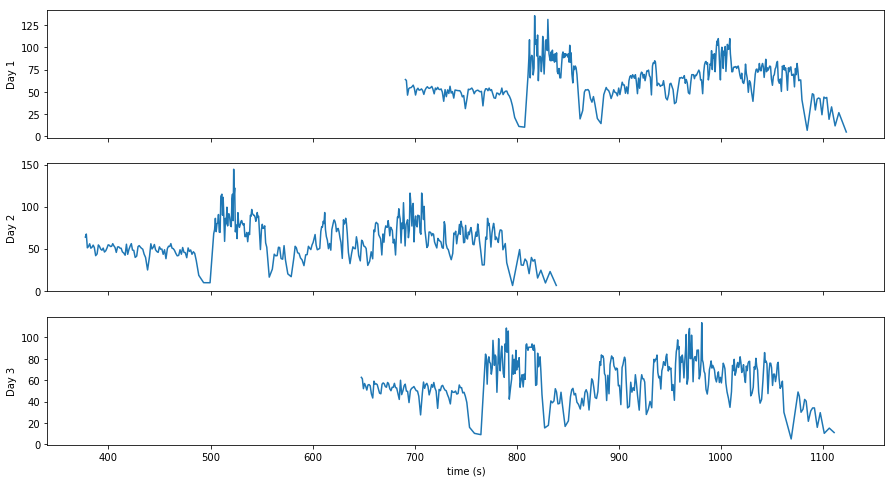

In [55]:
fig_size = [15,8] # Figure width and height
fig, ax  = plt.subplots(figsize=fig_size, ncols=1, nrows=3, sharex='all')

ax[0].plot(x1,y1)
ax[1].plot(x2,y2)
ax[2].plot(x3,y3)
ax[0].set_ylabel('Day 1')
ax[1].set_ylabel('Day 2')
ax[2].set_ylabel('Day 3')
ax[2].set_xlabel('time (s)')
plt.show()

Because the performances were done on different days, the timestamps associated do not correspond between them. In order to compare them we need to use a common unit, which is the beat number, already computed:

In [53]:
x = df[df['day']==1]['beat_number'] # common x axis

Thus, we can plot again using only one subplot:

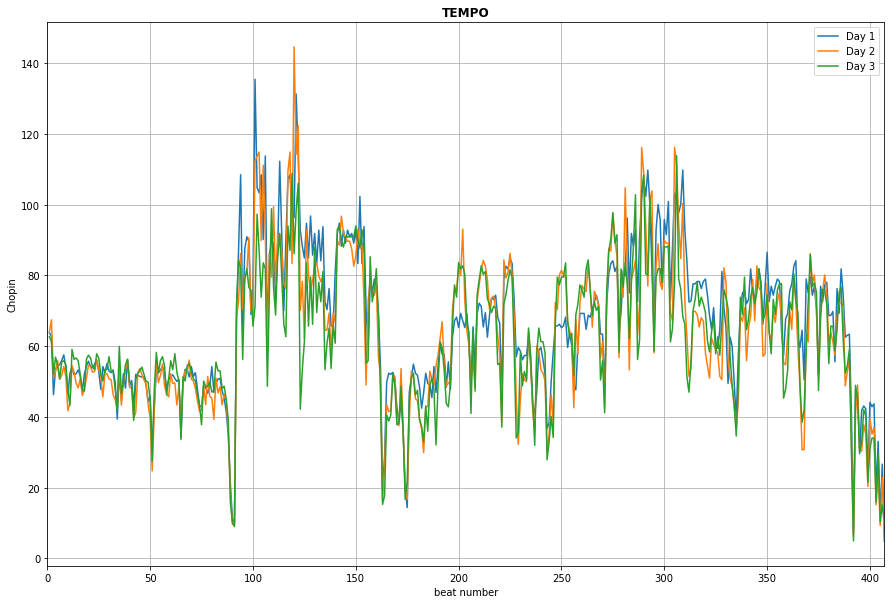

In [32]:
fig_size = [15,10] # Figure width and height
fig, ax  = plt.subplots(figsize=fig_size, ncols=1, nrows=1)

ax.plot(x,y1, label='Day 1')
ax.plot(x,y2, label='Day 2')
ax.plot(x,y3, label='Day 3')
ax.grid()
ax.legend()

ax.set_ylabel('Chopin')
ax.set_xlim([0, df['beat_number'].max()])
ax.set_title('TEMPO', {'fontweight' :'bold'})
ax.set_xlabel('beat number')
plt.show()

Overall, the performance is consistent, but there are some differences. We can use `pandas` to look at the main statistics by day:

In [28]:
df.groupby('day')['tempo'].describe()

count       mean        std       min        25%        50%        75%  \
day                                                                           
1    407.0  65.711760  20.227675  4.880033  51.724138  65.217391  78.604119   
2    407.0  62.652933  20.821440  6.233979  49.430238  60.444079  77.170999   
3    407.0  61.975084  18.875092  4.915785  49.811747  61.180605  76.089250   

            max  
day              
1    135.414708  
2    144.558566  
3    113.801557

We see for example that day 1 had the slowest value at 4.88 BPM (beats per minute) and the highest mean at 65.71 BPM. Day 2 had the fastest tempo at 144.56 BPM. Day 3 had the lowest mean at 61.98 BPM and the lowest maximum tempo for all days at 113.8 BPM which is roughly 30 points behind the fastest peak on day 2.
We can try to look at how these data are distributed using a histogram:

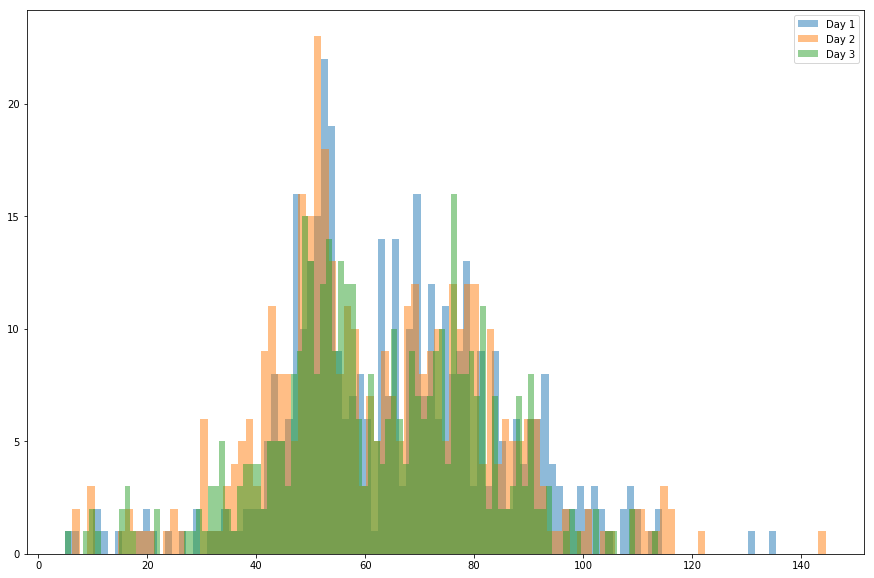

In [48]:
fig_size = [15,10] # Figure width and height
fig, ax  = plt.subplots(figsize=fig_size, ncols=1, nrows=1)
bin_n    = 100
ax.hist(y1,bins=bin_n, alpha=0.5, label='Day 1')
ax.hist(y2,bins=bin_n, alpha=0.5, label='Day 2')
ax.hist(y3,bins=bin_n, alpha=0.5, label='Day 3')
ax.legend()
plt.show()

We can only see things we already saw in the description table, notably, the distribution of tempo values is mainly populated aroung 40 to 90 BPM with a lot of values around 50 BPM on Day 1 and Day 2.

There are more analyses to be done...